<a href="https://colab.research.google.com/github/Mahatechie/Canteen_waste_analytics/blob/main/Copy_of_canteen_waste_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib openpyxl gspread --quiet


In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)


In [3]:
import pandas as pd

# Step 1: Get CSV version of the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1Gt4IYa_UpMnBP5HMj9vG3JhzSlRKvuAowuFkroheyMs/edit?usp=sharing"
csv_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")

# Step 2: Skip first 2 rows (NaN + header row), use no header so we can set our own
df = pd.read_csv(csv_url, skiprows=2, usecols=range(2, 10), header=None)

# Step 3: Assign correct column names manually
df.columns = ['Date', 'Meal Type', 'Dish Name', 'Cooked Qty', 'Consumed Qty', 'Leftover Qty', 'Cost (INR)', 'Feedback']

# Step 4: Check result
print("✅ Clean columns:", df.columns)
df.head()

# Drop rows that are fully NaN or are just duplicate headers
df = df.dropna(how='all')  # Drop fully empty rows
df = df[df['Date'] != 'Date']  # Drop repeated header row if present

# Reset the index
df.reset_index(drop=True, inplace=True)

# Convert numeric columns to proper types
numeric_cols = ['Cooked Qty', 'Consumed Qty', 'Leftover Qty', 'Cost (INR)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.head()


✅ Clean columns: Index(['Date', 'Meal Type', 'Dish Name', 'Cooked Qty', 'Consumed Qty',
       'Leftover Qty', 'Cost (INR)', 'Feedback'],
      dtype='object')


,Date,Meal Type,Dish Name,Cooked Qty,Consumed Qty,Leftover Qty,Cost (INR),Feedback
0,2025-07-01,Lunch,Sambar Rice,120,100,20,1000,Good
1,2025-07-01,Lunch,Curd Rice,100,95,5,900,Excellent
2,2025-07-01,Lunch,Poori,80,70,10,850,Average
3,2025-07-02,Dinner,Chappathi,150,130,20,1200,Good
4,2025-07-02,Dinner,Veg Kurma,130,115,15,1100,Excellent


In [4]:
# Add Wastage %
df['Wastage %'] = (df['Leftover Qty'] / df['Cooked Qty']) * 100

# Add Cost per Plate
df['Cost per Plate'] = df['Cost (INR)'] / df['Consumed Qty']

# Round off values to 2 decimal points
df['Wastage %'] = df['Wastage %'].round(2)
df['Cost per Plate'] = df['Cost per Plate'].round(2)

# Display updated DataFrame
df.head()


,Date,Meal Type,Dish Name,Cooked Qty,Consumed Qty,Leftover Qty,Cost (INR),Feedback,Wastage %,Cost per Plate
0,2025-07-01,Lunch,Sambar Rice,120,100,20,1000,Good,16.67,10.00
1,2025-07-01,Lunch,Curd Rice,100,95,5,900,Excellent,5.00,9.47
2,2025-07-01,Lunch,Poori,80,70,10,850,Average,12.50,12.14
3,2025-07-02,Dinner,Chappathi,150,130,20,1200,Good,13.33,9.23
4,2025-07-02,Dinner,Veg Kurma,130,115,15,1100,Excellent,11.54,9.57


In [5]:
!pip install seaborn --quiet


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean theme
sns.set(style="whitegrid")


/tmp/ipython-input-2136609523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dish Name', y='Wastage %', data=df, palette='Oranges_r')
/tmp/ipython-input-2136609523.py:7: UserWarning: Glyph 127835 (\N{CURRY AND RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127835 (\N{CURRY AND RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


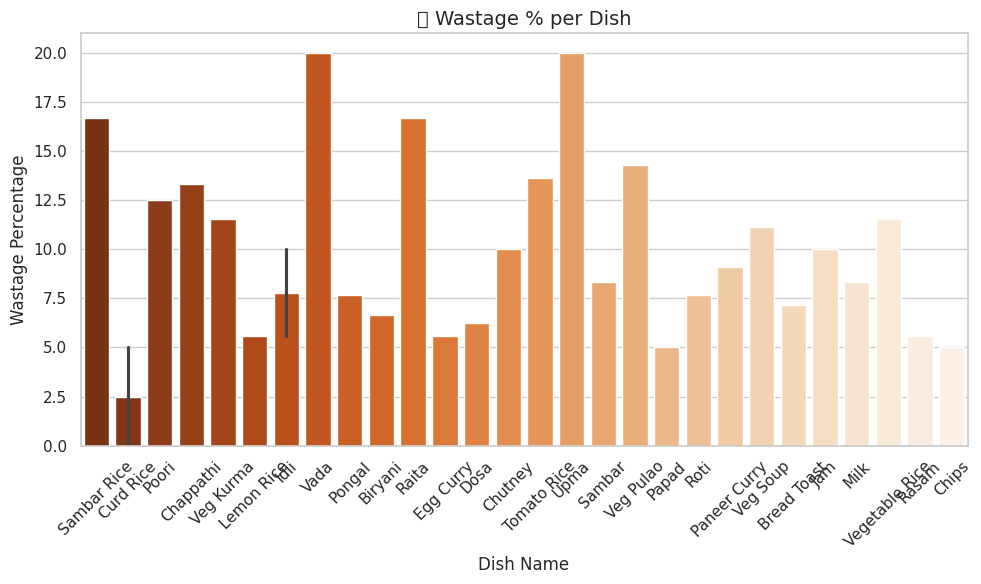

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='Dish Name', y='Wastage %', data=df, palette='Oranges_r')
plt.title("🍛 Wastage % per Dish", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Wastage Percentage")
plt.xlabel("Dish Name")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2269615075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dish Name', y='Cost per Plate', data=df, palette='Blues')
/tmp/ipython-input-2269615075.py:7: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


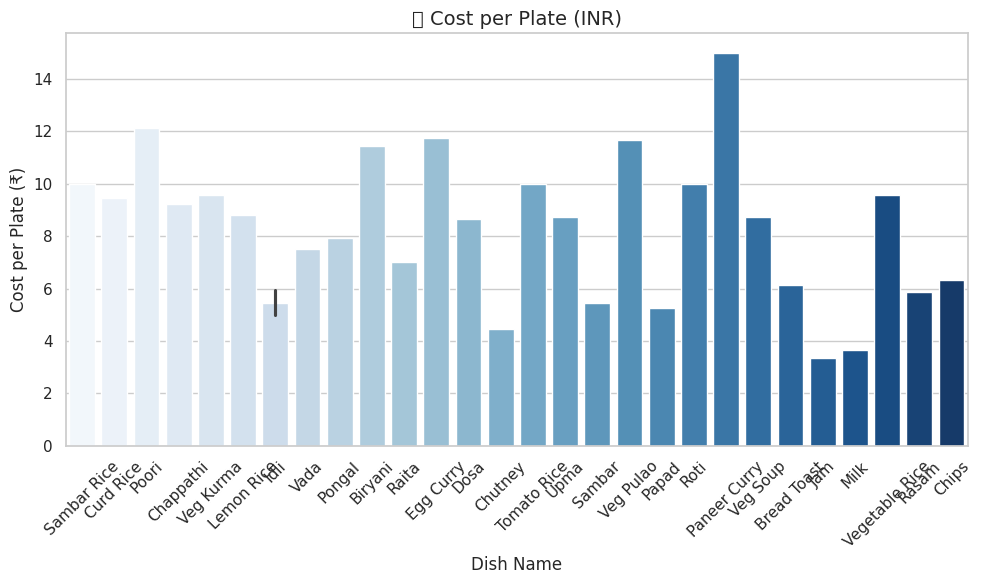

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='Dish Name', y='Cost per Plate', data=df, palette='Blues')
plt.title("💸 Cost per Plate (INR)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Cost per Plate (₹)")
plt.xlabel("Dish Name")
plt.tight_layout()
plt.show()
